In [1]:
import networkx as nx
import dataclasses
from src.vertex_params import VertexParams, VertexType

In [37]:
graph = nx.Graph()
graph.add_nodes_from(
    [(
        0,
        dataclasses.asdict(
            VertexParams(vertex_type=VertexType.START, position=(0.5, 0.5), level=0)
        ),
    )]
)

graph.add_nodes_from(
    [
        (0, dataclasses.asdict(
            VertexParams(vertex_type=VertexType.START_USED, position=(0.5, 0.5), level=0))),
        (1, dataclasses.asdict(
            VertexParams(vertex_type=VertexType.EXTERIOR, position=(0.0, 0.0), level=1))),
        (2, dataclasses.asdict(
            VertexParams(vertex_type=VertexType.EXTERIOR, position=(0.0, 1.0), level=1))),
        (3, dataclasses.asdict(
            VertexParams(vertex_type=VertexType.EXTERIOR, position=(1.0, 0.0), level=1))),
        (4, dataclasses.asdict(
            VertexParams(vertex_type=VertexType.EXTERIOR, position=(1.0, 1.0), level=1))),
        (5, dataclasses.asdict(
            VertexParams(vertex_type=VertexType.INTERIOR, position=None, level=1))),
        (6, dataclasses.asdict(
            VertexParams(vertex_type=VertexType.INTERIOR, position=None, level=1))),
    ]
)

graph.add_edges_from(
    [
        (0, 5),
        (0, 6),

        (1, 2),
        (1, 3),
        (2, 3),
        (2, 4),
        (3, 4),

        (1, 5),
        (2, 5),
        (3, 5),
        (2, 6),
        (3, 6),
        (4, 6),
    ]
)

In [38]:
from src.visualization import draw

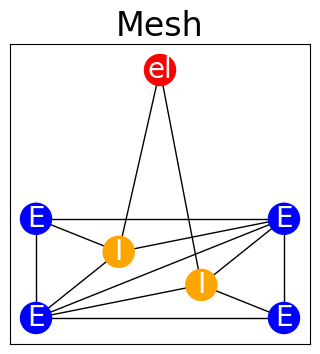

In [39]:
draw(graph, figsize=(3, 3))

In [40]:
from src.productions.production9 import Production9

In [41]:
prod9 = Production9()
subgraph = prod9.find_isomorphic_to_left_side(graph=graph)

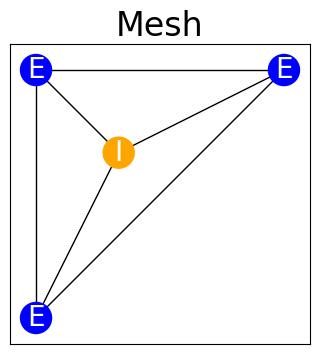

In [42]:
draw(subgraph, figsize=(3, 3))

In [43]:
new_graph = prod9.apply(graph=graph, subgraph=subgraph)

NODE OF 0 Node(id=8, params=VertexParams(vertex_type=<VertexType.EXTERIOR: 'E'>, position=(0.0, 0.0), level=2))


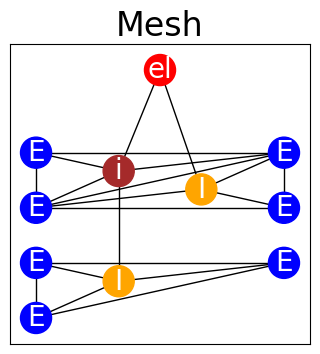

In [44]:
draw(new_graph, figsize=(3, 3))

In [45]:
subgraph = prod9.find_isomorphic_to_left_side(new_graph)

In [46]:
new_new_graph = prod9.apply(new_graph, subgraph)

NODE OF 0 Node(id=12, params=VertexParams(vertex_type=<VertexType.EXTERIOR: 'E'>, position=(0.0, 1.0), level=2))


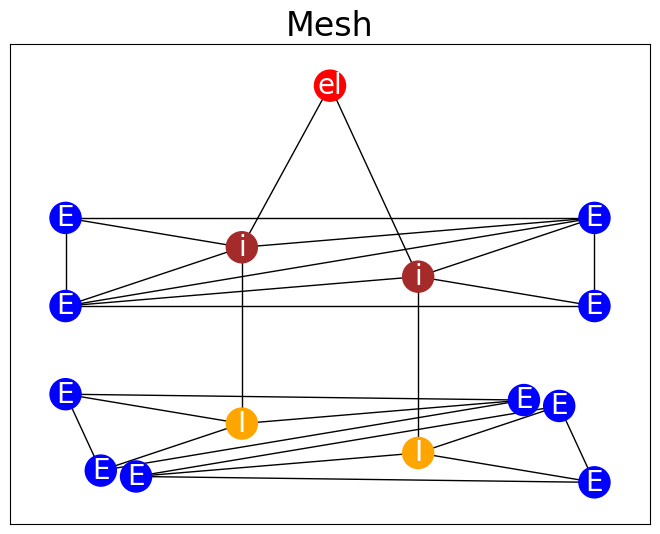

In [47]:
draw(new_new_graph)

## Tests

## 1

In [48]:
graph = nx.Graph()
graph.add_nodes_from(
    [(
        0,
        dataclasses.asdict(
            VertexParams(vertex_type=VertexType.START, position=(0.5, 0.5), level=0)
        ),
    )]
)

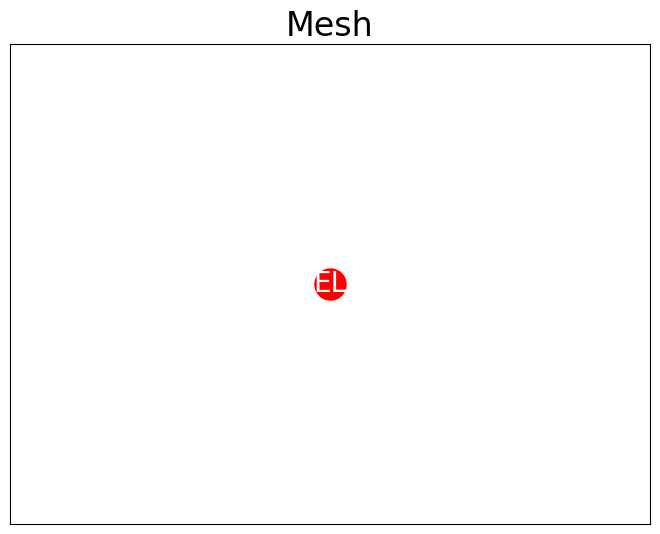

In [49]:
draw(graph)

In [50]:
prod9.find_isomorphic_to_left_side(graph) == None

True

## 2

In [51]:
G = nx.Graph()
G.add_nodes_from(
    [
        (
            0,
            dataclasses.asdict(
                VertexParams(
                    vertex_type=VertexType.START_USED, position=(0.5, 0.5), level=0
                )
            ),
        ),
        (
            1,
            dataclasses.asdict(
                VertexParams(
                    vertex_type=VertexType.EXTERIOR, position=(0.0, 0.0), level=1
                )
            ),
        ),
        (
            2,
            dataclasses.asdict(
                VertexParams(
                    vertex_type=VertexType.EXTERIOR, position=(0.0, 1.0), level=1
                )
            ),
        ),
        (
            3,
            dataclasses.asdict(
                VertexParams(
                    vertex_type=VertexType.EXTERIOR, position=(1.0, 0.0), level=1
                )
            ),
        ),
        (
            4,
            dataclasses.asdict(
                VertexParams(
                    vertex_type=VertexType.EXTERIOR, position=(1.0, 1.0), level=1
                )
            ),
        ),
        (
            5,
            dataclasses.asdict(
                VertexParams(
                    vertex_type=VertexType.INTERIOR, position=None, level=1
                )
            ),
        ),
        (
            6,
            dataclasses.asdict(
                VertexParams(
                    vertex_type=VertexType.INTERIOR, position=None, level=1
                )
            ),
        ),
    ]
)

G.add_edges_from(
    [
        (0, 5),
        (0, 6),
        (1, 2),
        (1, 3),
        (2, 3),
        (2, 4),
        (3, 4),
        (1, 5),
        (2, 5),
        (3, 5),
        (2, 6),
        (3, 6),
        (4, 6),

    ]
)

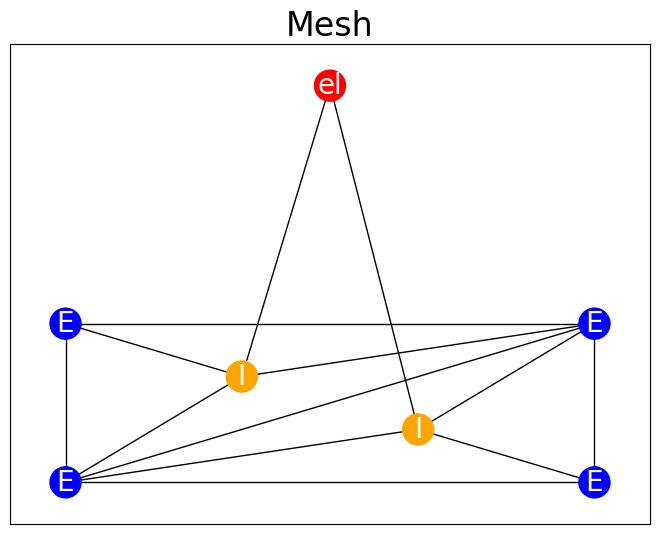

In [52]:
draw(G)

In [53]:
prod9.find_isomorphic_to_left_side(G) is not None

True

## 3

In [54]:
G = nx.Graph()
G.add_nodes_from(
    [
        (
            0,
            dataclasses.asdict(
                VertexParams(
                    vertex_type=VertexType.START_USED, position=(0.5, 0.5), level=0
                )
            ),
        ),
        (
            1,
            dataclasses.asdict(
                VertexParams(
                    vertex_type=VertexType.EXTERIOR, position=(0.0, 1.0), level=1
                )
            ),
        ),
        (
            2,
            dataclasses.asdict(
                VertexParams(
                    vertex_type=VertexType.EXTERIOR, position=(1.0, 1.0), level=1
                )
            ),
        ),
        (
            3,
            dataclasses.asdict(
                VertexParams(
                    vertex_type=VertexType.INTERIOR, position=None, level=1
                )
            ),
        )
    ]
)

G.add_edges_from(
    [
        (0, 3),
        (1, 2),
        (1, 3),
        (3, 2),

    ]
)


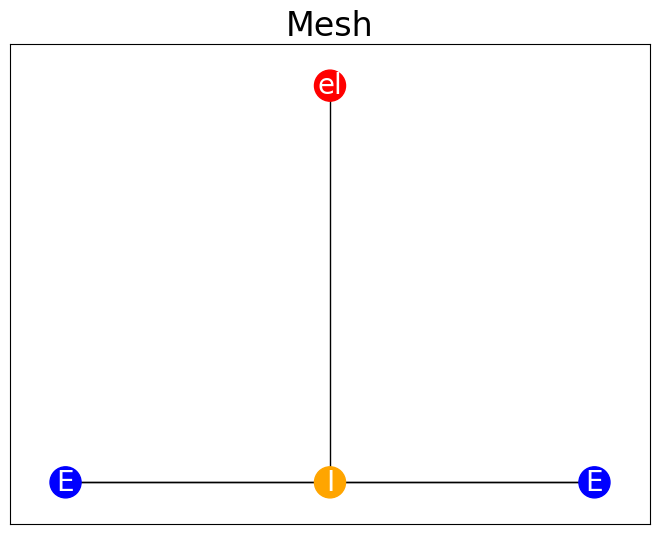

In [55]:
draw(G)

In [56]:

prod9.find_isomorphic_to_left_side(G) is None

True

## 4

In [57]:
G = nx.Graph()
G.add_nodes_from(
    [
        (
            0,
            dataclasses.asdict(
                VertexParams(
                    vertex_type=VertexType.START_USED, position=(0.5, 0.5), level=0
                )
            ),
        ),
        (
            2,
            dataclasses.asdict(
                VertexParams(
                    vertex_type=VertexType.EXTERIOR, position=(0.0, 1.0), level=1
                )
            ),
        ),
        (
            3,
            dataclasses.asdict(
                VertexParams(
                    vertex_type=VertexType.EXTERIOR, position=(1.0, 0.0), level=1
                )
            ),
        ),
        (
            4,
            dataclasses.asdict(
                VertexParams(
                    vertex_type=VertexType.EXTERIOR, position=(1.0, 1.0), level=1
                )
            ),
        ),
        (
            5,
            dataclasses.asdict(
                VertexParams(
                    vertex_type=VertexType.INTERIOR, position=None, level=1
                )
            ),
        ),
    ]
)

G.add_edges_from(
    [
        (0, 5),
        (2, 3),
        (2, 4),
        (2, 5),
        (5, 4),
        (3, 5),

    ]
)

True

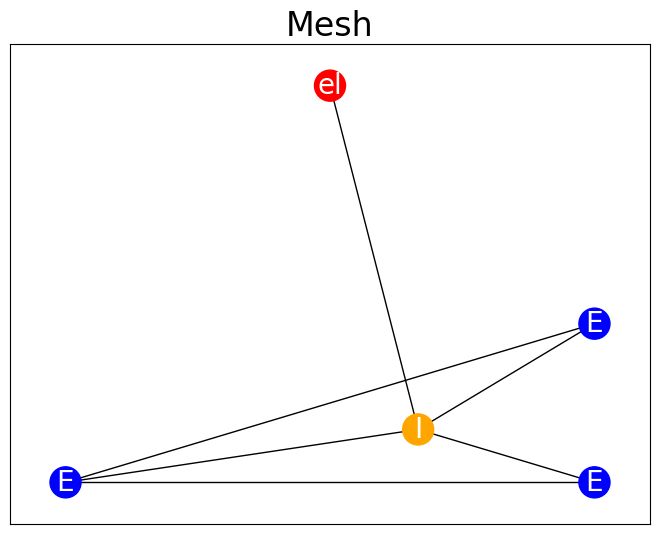

In [58]:
draw(G)
prod9.find_isomorphic_to_left_side(G) is None

## 5

In [59]:
G = nx.Graph()
G.add_nodes_from(
    [
        (
            0,
            dataclasses.asdict(
                VertexParams(
                    vertex_type=VertexType.START_USED, position=(0.5, 0.5), level=0
                )
            ),
        ),
        (
            1,
            dataclasses.asdict(
                VertexParams(
                    vertex_type=VertexType.EXTERIOR, position=(0.0, 0.0), level=1
                )
            ),
        ),
        (
            2,
            dataclasses.asdict(
                VertexParams(
                    vertex_type=VertexType.EXTERIOR, position=(0.0, 1.0), level=1
                )
            ),
        ),
        (
            3,
            dataclasses.asdict(
                VertexParams(
                    vertex_type=VertexType.INTERIOR, position=(1.0, 0.0), level=1
                )
            ),
        ),
        (
            4,
            dataclasses.asdict(
                VertexParams(
                    vertex_type=VertexType.INTERIOR, position=(1.0, 1.0), level=1
                )
            ),
        ),
        (
            5,
            dataclasses.asdict(
                VertexParams(
                    vertex_type=VertexType.INTERIOR, position=None, level=1
                )
            ),
        ),
        (
            6,
            dataclasses.asdict(
                VertexParams(
                    vertex_type=VertexType.INTERIOR, position=None, level=1
                )
            ),
        ),
    ]
)

G.add_edges_from(
    [
        (0, 5),
        (0, 6),

        (1, 2),
        (1, 3),
        (2, 3),
        (2, 4),
        (3, 4),

        (1, 5),
        (2, 5),
        (3, 5),
        (2, 6),
        (3, 6),
        (4, 6),
    ]
)

True

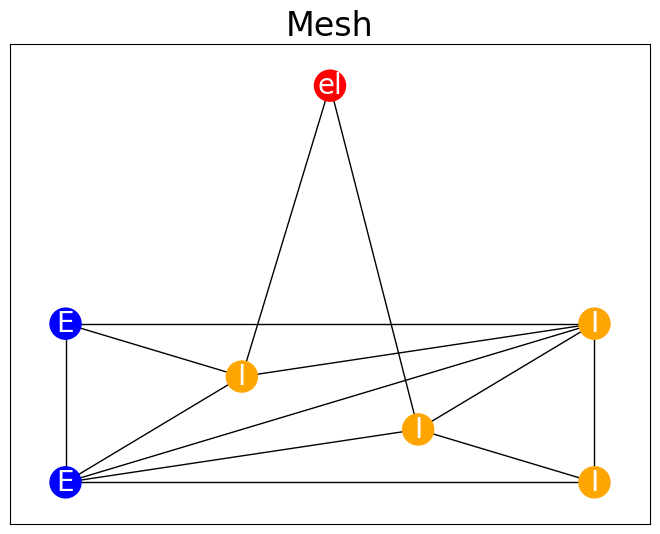

In [60]:
draw(G)
prod9.find_isomorphic_to_left_side(G) is None

## 6

In [61]:
G = nx.Graph()
G.add_nodes_from(
    [
        (
            0,
            dataclasses.asdict(
                VertexParams(
                    vertex_type=VertexType.START_USED, position=(0.5, 0.5), level=0
                )
            ),
        ),
        (
            1,
            dataclasses.asdict(
                VertexParams(
                    vertex_type=VertexType.EXTERIOR, position=(0.0, 0.0), level=1
                )
            ),
        ),
        (
            2,
            dataclasses.asdict(
                VertexParams(
                    vertex_type=VertexType.EXTERIOR, position=(0.0, 1.0), level=1
                )
            ),
        ),
        (
            3,
            dataclasses.asdict(
                VertexParams(
                    vertex_type=VertexType.EXTERIOR, position=(1.0, 0.0), level=1
                )
            ),
        ),
        (
            4,
            dataclasses.asdict(
                VertexParams(
                    vertex_type=VertexType.EXTERIOR, position=(1.0, 1.0), level=1
                )
            ),
        ),
        (
            5,
            dataclasses.asdict(
                VertexParams(
                    vertex_type=VertexType.INTERIOR_USED, position=None, level=1
                )
            ),
        ),
        (
            6,
            dataclasses.asdict(
                VertexParams(
                    vertex_type=VertexType.INTERIOR, position=None, level=1
                )
            ),
        ),
        (
            7,
            dataclasses.asdict(
                VertexParams(
                    vertex_type=VertexType.EXTERIOR, position=(0.0, 0.0), level=2
                )
            ),
        ),
        (
            8,
            dataclasses.asdict(
                VertexParams(
                    vertex_type=VertexType.EXTERIOR, position=(0.0, 1.0), level=2
                )
            ),
        ),
        (
            9,
            dataclasses.asdict(
                VertexParams(
                    vertex_type=VertexType.EXTERIOR, position=(1.0, 0.0), level=2
                )
            ),
        ),
        (
            10,
            dataclasses.asdict(
                VertexParams(
                    vertex_type=VertexType.INTERIOR, position=None, level=2
                )
            ),
        )
    ]
)

G.add_edges_from(
    [
        (0, 5),
        (0, 6),
        (1, 2),
        (1, 3),
        (2, 3),
        (2, 4),
        (3, 4),
        (1, 5),
        (2, 5),
        (3, 5),
        (2, 6),
        (3, 6),
        (4, 6),
        (5, 10),
        (7, 10),
        (7, 8),
        (7, 9),
        (8, 9),
        (8, 10),
        (10, 9)
    ]
)


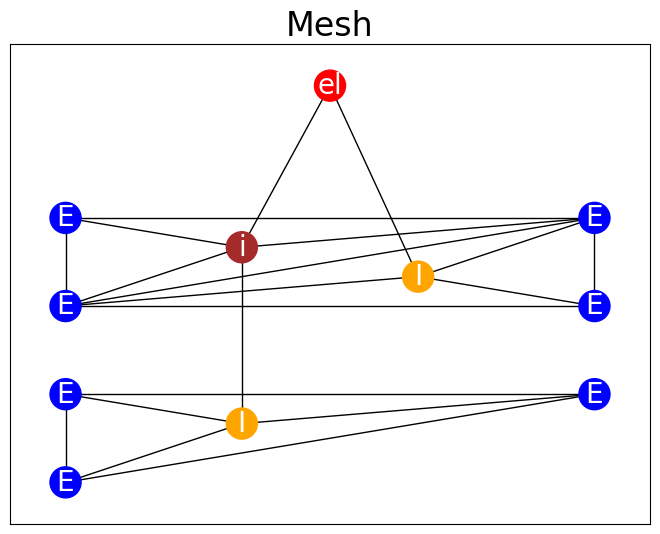

In [62]:
draw(G)

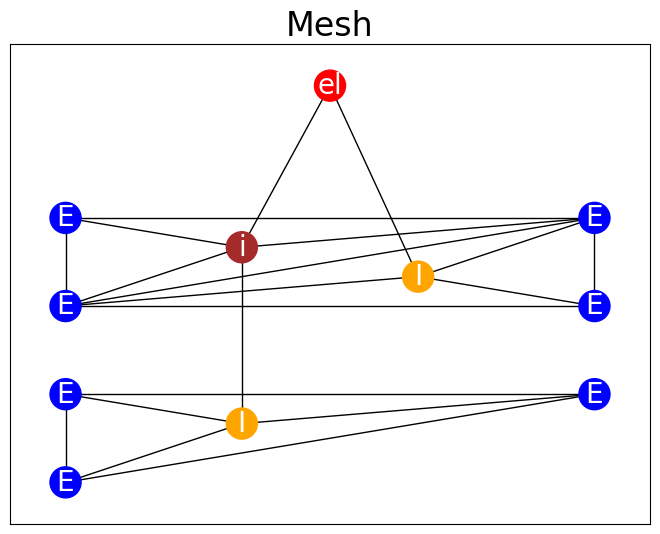

In [63]:
draw(new_graph)